In [2]:
import pandas as pd

# Read the CSV into a DataFrame
usd_jpy_df = pd.read_csv('USDJPY_D1.csv', sep='\t')

# Reset the index to move 'Time' into a column
usd_jpy_df.reset_index(inplace=True)

# Extract the first 10 characters from the 'index' column
usd_jpy_df['index'] = usd_jpy_df['index'].astype(str).str.slice(0, 10)

# Rename the columns
usd_jpy_df.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'spread']

usd_jpy_df['date'] = pd.to_datetime(usd_jpy_df['date'])

print(usd_jpy_df.info())
usd_jpy_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5020 non-null   datetime64[ns]
 1   open    5020 non-null   float64       
 2   high    5020 non-null   float64       
 3   low     5020 non-null   float64       
 4   close   5020 non-null   float64       
 5   volume  5020 non-null   int64         
 6   spread  5020 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 274.7 KB
None


,date,open,high,low,close,volume,spread
0,2008-10-17,101.550,101.790,100.600,101.655,12491395,14
1,2008-10-19,101.590,101.700,101.400,101.490,285361,84
2,2008-10-20,101.490,102.410,101.350,102.115,11347174,17
3,2008-10-21,102.120,102.155,100.050,100.225,15796358,18
4,2008-10-22,100.225,100.435,97.225,97.735,15914004,17
...,...,...,...,...,...,...,...
5015,2024-11-07,154.307,154.708,152.689,153.172,750704,10
5016,2024-11-08,153.173,153.366,152.139,152.608,657329,8
5017,2024-11-10,152.631,152.946,152.602,152.907,10136,137
5018,2024-11-11,152.910,153.952,152.870,153.521,460709,7


In [ ]:
import pandas as pd

# Read the CSV into a DataFrame
usd_jpy_df = pd.read_csv('USDJPY1440.csv', sep='\t', header=None)

# Set new column names
usd_jpy_df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']

usd_jpy_df['date'] = pd.to_datetime(usd_jpy_df['date'])

print(usd_jpy_df.info())
usd_jpy_df

FileNotFoundError: [Errno 2] No such file or directory: 'USDJPY1440.csv'

#### Data Checking

In [4]:
# Calculate the time difference between consecutive rows
time_diff = usd_jpy_df['date'].diff()

# Check if all differences are exactly 1 minute (60 seconds)
one_minute_diff = time_diff == pd.Timedelta(minutes=1440)

# Print rows where the difference is not 1 minute (if any)
missing_intervals = usd_jpy_df[~one_minute_diff]
print("Rows with time differences other than 1 day:")
print(missing_intervals)

Rows with time differences other than 1 day:
           date     open     high      low    close    volume  spread
0    2008-10-17  101.550  101.790  100.600  101.655  12491395      14
1    2008-10-19  101.590  101.700  101.400  101.490    285361      84
7    2008-10-26   93.335   93.530   91.845   93.530    521872     148
13   2008-11-02   98.615   98.620   98.195   98.520      6187      51
19   2008-11-09   99.135   99.205   98.630   99.000     13327      80
...         ...      ...      ...      ...      ...       ...     ...
4993 2024-10-13  149.029  149.391  148.987  149.305      9934     102
4999 2024-10-20  149.439  149.641  149.412  149.602      7577      85
5005 2024-10-27  153.176  153.221  152.652  152.955     32475     104
5011 2024-11-03  152.260  152.551  152.181  152.288     16369      41
5017 2024-11-10  152.631  152.946  152.602  152.907     10136     137

[840 rows x 7 columns]


In [30]:
# Define the start date and number of rows
start_date = pd.to_datetime("2024-04-30 16:07:00")
num_rows = 200000

# Calculate the last row date by adding (num_rows - 1) minutes
last_row_date = start_date + pd.Timedelta(minutes=num_rows - 1)

print("Last row date:", last_row_date)

Last row date: 2024-09-16 13:26:00


In [5]:
# Check for NaN values in the entire DataFrame
nan_check = usd_jpy_df.isna().sum()

# Print the result
print("Number of NaN values in each column:")
print(nan_check)

# Alternatively, if you just want to know if there are any NaN values at all
has_nan = usd_jpy_df.isna().any().any()
print("Does the DataFrame have any NaN values?", has_nan)

Number of NaN values in each column:
date      0
open      0
high      0
low       0
close     0
volume    0
spread    0
dtype: int64
Does the DataFrame have any NaN values? False


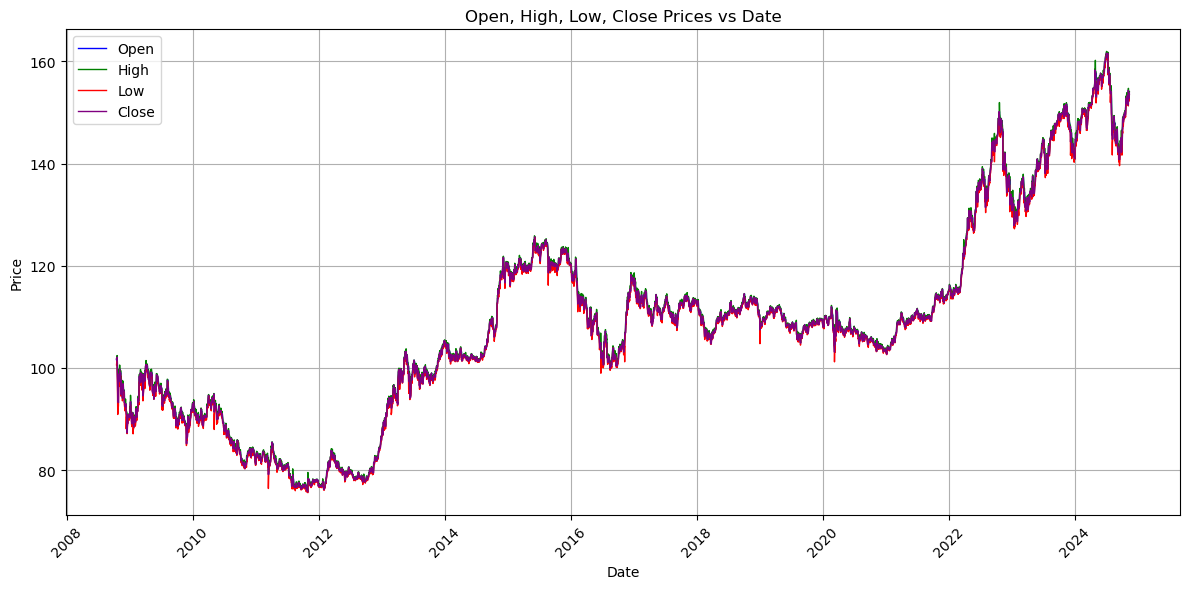

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'date' column is in datetime format
usd_jpy_df['date'] = pd.to_datetime(usd_jpy_df['date'])

# Convert relevant columns to numpy arrays
dates = np.array(usd_jpy_df['date'])
open_prices = np.array(usd_jpy_df['open'])
high_prices = np.array(usd_jpy_df['high'])
low_prices = np.array(usd_jpy_df['low'])
close_prices = np.array(usd_jpy_df['close'])

# Plot 'open', 'high', 'low', and 'close' vs 'date'
plt.figure(figsize=(12, 6))

# Plot open, high, low, close prices
plt.plot(dates, open_prices, label='Open', color='blue', linestyle='-', linewidth=1)
plt.plot(dates, high_prices, label='High', color='green', linestyle='-', linewidth=1)
plt.plot(dates, low_prices, label='Low', color='red', linestyle='-', linewidth=1)
plt.plot(dates, close_prices, label='Close', color='purple', linestyle='-', linewidth=1)

# Title and labels
plt.title('Open, High, Low, Close Prices vs Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

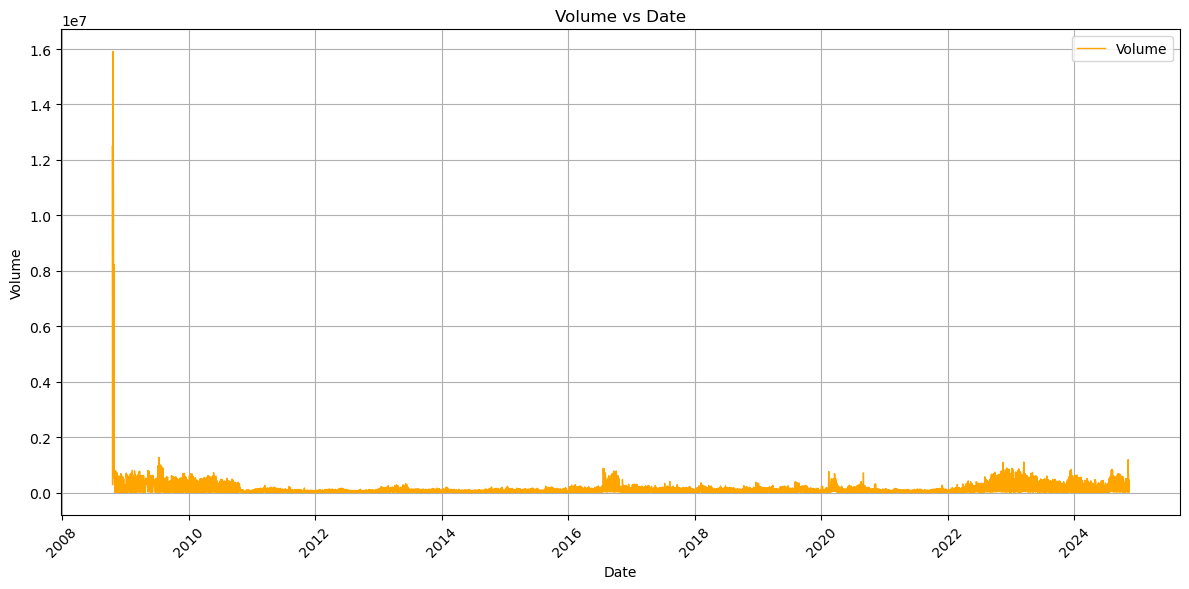

In [7]:
# Convert 'volume' column to numpy array
volume = np.array(usd_jpy_df['volume'])

# Plot 'volume' vs 'date'
plt.figure(figsize=(12, 6))

# Plot volume
plt.plot(dates, volume, label='Volume', color='orange', linestyle='-', linewidth=1)

# Title and labels
plt.title('Volume vs Date')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Features Engineering

In [ ]:
usd_jpy_df

,date,open,high,low,close,volume
0,2024-04-30 16:07:00,157.551,157.557,157.545,157.556,31
1,2024-04-30 16:08:00,157.557,157.568,157.544,157.549,59
2,2024-04-30 16:09:00,157.549,157.550,157.534,157.537,102
3,2024-04-30 16:10:00,157.537,157.548,157.525,157.542,119
4,2024-04-30 16:11:00,157.541,157.541,157.510,157.522,69
...,...,...,...,...,...,...
199995,2024-11-12 05:55:00,153.547,153.570,153.546,153.562,544
199996,2024-11-12 05:56:00,153.563,153.574,153.546,153.574,283
199997,2024-11-12 05:57:00,153.580,153.590,153.570,153.581,532
199998,2024-11-12 05:58:00,153.580,153.594,153.565,153.591,263


In [ ]:
import pandas as pd

df = usd_jpy_df.copy()

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Time Gap (in minutes) - Difference between consecutive timestamps
df['time_gap'] = (df['date'].shift(-1) - df['date']).dt.total_seconds() / 60

# Next Close
df['next_close'] = df['close'].shift(-1)

# Previous OHLC
df['prev_open'] = df['open'].shift(1)
df['prev_high'] = df['high'].shift(1)
df['prev_low'] = df['low'].shift(1)
df['prev_close'] = df['close'].shift(1)

# OHLC Change and Percentage Change
df['open_change'] = df['open'] - df['prev_open']
df['high_change'] = df['high'] - df['prev_high']
df['low_change'] = df['low'] - df['prev_low']
df['close_change'] = df['close'] - df['prev_close']

df['open_change_pct'] = (df['open_change'] / df['prev_open']) * 100
df['high_change_pct'] = (df['high_change'] / df['prev_high']) * 100
df['low_change_pct'] = (df['low_change'] / df['prev_low']) * 100
df['close_change_pct'] = (df['close_change'] / df['prev_close']) * 100

# Moving Averages (5, 10, 15 periods)
df['ma_close_5'] = df['close'].rolling(window=5).mean()
df['ma_close_10'] = df['close'].rolling(window=10).mean()
df['ma_close_15'] = df['close'].rolling(window=15).mean()

# Close MA Ratio
df['close_ma_5_ratio'] = df['close'] / df['ma_close_5']
df['close_ma_10_ratio'] = df['close'] / df['ma_close_10']
df['close_ma_15_ratio'] = df['close'] / df['ma_close_15']

# Range Features
df['range'] = df['high'] - df['low']
df['prev_range'] = df['prev_high'] - df['prev_low']
df['range_change'] = df['range'] - df['prev_range']

# Volatility Features (rolling standard deviation of 'close')
df['volatility'] = df['close'].rolling(window=5).std()
df['prev_volatility'] = df['volatility'].shift(1)
df['volatility_change'] = df['volatility'] - df['prev_volatility']

# Volume Features
df['prev_vol'] = df['volume'].shift(1)
df['vol_change'] = df['volume'] - df['prev_vol']

# Volume Moving Averages (5 and 10 periods)
df['vol_avg_5'] = df['volume'].rolling(window=5).mean()
df['vol_avg_10'] = df['volume'].rolling(window=10).mean()

# Volume Average Change (5 and 10 periods)
df['vol_avg_5_change'] = df['vol_avg_5'] - df['vol_avg_5'].shift(1)
df['vol_avg_10_change'] = df['vol_avg_10'] - df['vol_avg_10'].shift(1)

df['vol_avg_5_change_pct'] = (df['vol_avg_5_change'] / df['vol_avg_5'].shift(1)) * 100
df['vol_avg_10_change_pct'] = (df['vol_avg_10_change'] / df['vol_avg_10'].shift(1)) * 100

# Volume Difference (5 and 10 periods)
df['vol_diff_5'] = df['volume'] - df['vol_avg_5']
df['vol_diff_10'] = df['volume'] - df['vol_avg_10']

# Calculate rolling sums for 'time_gap' over different window sizes
df['time_gap_5_rolling_sum'] = df['time_gap'].rolling(window=5).sum()
df['time_gap_10_rolling_sum'] = df['time_gap'].rolling(window=10).sum()
df['time_gap_15_rolling_sum'] = df['time_gap'].rolling(window=15).sum()

df = df.iloc[15:].reset_index(drop=True)

df = df[df['date'] >= '2009']

df

,date,open,high,low,close,volume,spread,time_gap,next_close,prev_open,...,prev_vol,vol_change,vol_avg_5,vol_avg_10,vol_avg_5_change,vol_avg_10_change,vol_avg_5_change_pct,vol_avg_10_change_pct,vol_diff_5,vol_diff_10
0,2009-01-19,91.200,91.235,90.145,90.635,467497,14,1440.0,89.820,90.955,...,22706.0,444791.0,445146.2,453836.0,-25674.6,-8250.6,-5.453158,-1.785509,22350.8,13661.0
1,2009-01-20,90.635,90.970,89.670,89.820,512949,15,1440.0,89.050,91.200,...,467497.0,45452.0,434443.4,437734.0,-10702.8,-16102.0,-2.404334,-3.547978,78505.6,75215.0
2,2009-01-21,89.820,90.155,87.085,89.050,411064,13,1440.0,89.140,90.635,...,512949.0,-101885.0,401480.0,416958.2,-32963.4,-20775.8,-7.587502,-4.746216,9584.0,-5894.2
3,2009-01-22,89.050,89.550,88.065,89.140,425128,21,1440.0,88.760,89.820,...,411064.0,14064.0,367868.8,458095.7,-33611.2,41137.5,-8.371824,9.866097,57259.2,-32967.7
4,2009-01-23,89.130,89.630,87.985,88.760,473784,18,2880.0,88.430,89.050,...,425128.0,48656.0,458084.4,464452.6,90215.6,6356.9,24.523852,1.387679,15699.6,9331.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,2024-11-07,154.307,154.708,152.689,153.172,750704,10,1440.0,152.608,151.439,...,1188838.0,-438134.0,594760.6,516789.5,61737.4,71822.9,11.582498,16.141189,155943.4,233914.5
4936,2024-11-08,153.173,153.366,152.139,152.608,657329,8,2880.0,152.907,154.307,...,750704.0,-93375.0,722952.6,542515.7,128192.0,25726.2,21.553546,4.978081,-65623.6,114813.3
4937,2024-11-10,152.631,152.946,152.602,152.907,10136,137,1440.0,153.521,153.173,...,657329.0,-647193.0,626798.6,503144.3,-96154.0,-39371.4,-13.300180,-7.257191,-616662.6,-493008.3
4938,2024-11-11,152.910,153.952,152.870,153.521,460709,7,1440.0,153.807,152.631,...,10136.0,450573.0,613543.2,505163.9,-13255.4,2019.6,-2.114778,0.401396,-152834.2,-44454.9


In [9]:
# Count of NaN values in the entire DataFrame
nan_count = df.isna().sum().sum()

# Count of Inf values (both positive and negative) in the entire DataFrame
inf_count = ((df == float('inf')) | (df == float('-inf'))).sum().sum()

# Display the counts
print("Total NaN values:", nan_count)
print("Total Inf values:", inf_count)

Total NaN values: 2
Total Inf values: 0


# Model Selection

## Linear Regression

In [ ]:
import time
import numpy as np
from sklearn.linear_model import LinearRegression

# Separate df into features and target
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1   # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = 50      # Maximum number of windows to process
set_limit = False     # Set this to False to process all windows

# Define list of window sizes
# window_sizes = list(range(520,551,1))
window_sizes = [540] #Optimum

# List to store results
results = []

# Loop through each window size
for window_size in window_sizes:

    # Initiate lists to store RMSEs and percentages
    all_val_rmse = []
    all_val_rmse_perc = []
    all_train_rmse = []
    all_train_rmse_perc = []
    total_window_times = 0  # Variable to store total time for all windows

    # Calculate the number of windows based on dataset size
    num_windows = len(X) - window_size - num_predictions

    # Apply maximum window limit if set
    if set_limit:
        num_windows = min(num_windows, max_windows)

    # Loop through each sliding window with the gap applied
    window_number = 0
    while window_number < num_windows:
        start = window_number
        end = start + window_size
        X_train = X[start:end]
        y_train = y[start:end]

        # Prepare validation data for prediction
        X_val = X[end:end + num_predictions]
        y_val = y[end:end + num_predictions]

        # Track the start time of the window processing
        start_time = time.time()

        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on validation data
        y_pred_val = model.predict(X_val)
        # Predict on training data
        y_pred_train = model.predict(X_train)

        # Calculate RMSE and RMSE percentage for validation
        mse_val = np.mean((y_val - y_pred_val) ** 2)
        rmse_val = np.sqrt(mse_val)
        rmse_val_perc = (rmse_val / y_val)[0] * 100  # Convert to percentage

        # Calculate RMSE for training
        mse_train = np.mean((y_train - y_pred_train) ** 2)
        rmse_train = np.sqrt(mse_train)
        rmse_train_perc = (rmse_train / y_train).mean() * 100  # Convert to percentage

        # Track the end time of the window processing
        end_time = time.time()

        # Calculate the time taken for this window
        window_time = end_time - start_time
        total_window_times += window_time  # Add the window time to the total time

        # Append RMSEs and percentage errors
        all_val_rmse.append(rmse_val)
        all_val_rmse_perc.append(rmse_val_perc)
        all_train_rmse.append(rmse_train)
        all_train_rmse_perc.append(rmse_train_perc)

        # Move to the next window based on the gap
        window_number += gap

    # Calculate average, max, min, and variance for validation and training RMSEs, percentages
    avg_val_rmse = np.mean(all_val_rmse)
    var_val_rmse = np.var(all_val_rmse)

    avg_val_rmse_perc = np.mean(all_val_rmse_perc)
    var_val_rmse_perc = np.var(all_val_rmse_perc)

    avg_train_rmse = np.mean(all_train_rmse)
    var_train_rmse = np.var(all_train_rmse)

    avg_train_rmse_perc = np.mean(all_train_rmse_perc)
    var_train_rmse_perc = np.var(all_train_rmse_perc)

    # Append results to the list
    results.append({
        'window_size': window_size,
        'avg_val_rmse': avg_val_rmse,
        'var_val_rmse': var_val_rmse,
        'avg_val_rmse_perc': avg_val_rmse_perc,
        'var_val_rmse_perc': var_val_rmse_perc,
        'avg_train_rmse': avg_train_rmse,
        'var_train_rmse': var_train_rmse,
        'avg_train_rmse_perc': avg_train_rmse_perc,
        'var_train_rmse_perc': var_train_rmse_perc,
        'window_time': total_window_times  # Total time for all windows
    })

    # Print results for the current window size
    print(f'Window size [{window_size}] | Time Elapsed: {total_window_times:.3f} seconds')
    print(f'Average Training RMSE: {avg_train_rmse:.3f}, Training Variance RMSE: {var_train_rmse:.3f}')
    print(f'Average Validation RMSE: {avg_val_rmse:.3f}, Validation Variance RMSE: {var_val_rmse:.3f}')

# Convert results to a DataFrame
results_summary = pd.DataFrame(results)

# Print the resulting DataFrame
print("\nSummary of RMSE Results for Each Window Size:")
results_summary

Window size [320] | Time Elapsed: 13.294 seconds
Average Training RMSE: 0.524, Training Variance RMSE: 0.025
Average Validation RMSE: 0.452, Validation Variance RMSE: 0.237

Summary of RMSE Results for Each Window Size:


,window_size,avg_val_rmse,var_val_rmse,avg_val_rmse_perc,var_val_rmse_perc,avg_train_rmse,var_train_rmse,avg_train_rmse_perc,var_train_rmse_perc,window_time
0,320,0.452312,0.237396,0.40844,0.177321,0.523964,0.02541,0.486334,0.013526,13.293797


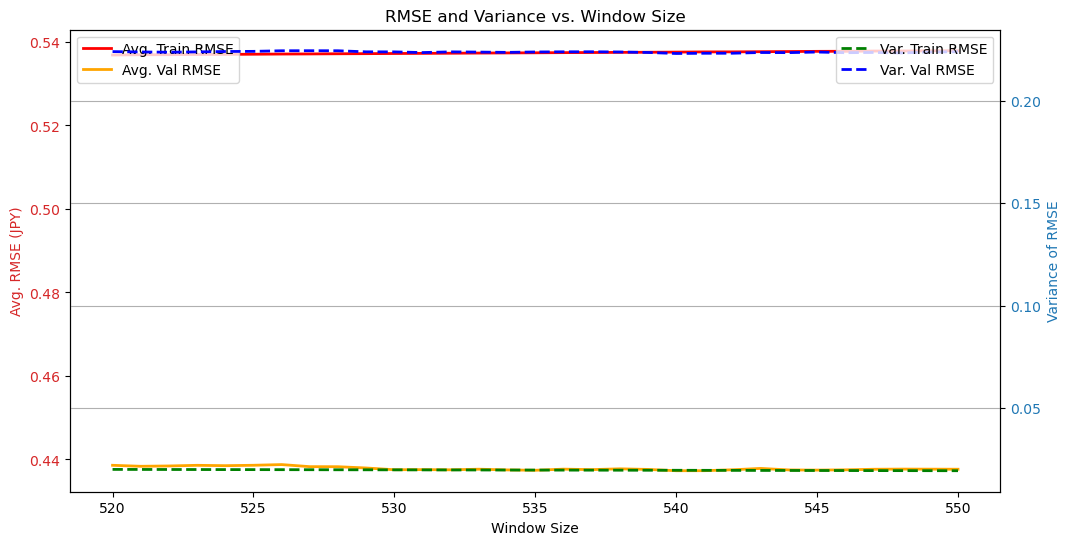

In [29]:
import matplotlib.pyplot as plt

# Ensure you have results_summary populated before running this code
if not results_summary.empty:
    # Plotting RMSE and Variance
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # RMSE Plot
    color = 'tab:red'
    ax1.set_xlabel('Window Size')
    ax1.set_ylabel('Avg. RMSE (JPY)', color=color)

    # Plot average RMSE as lines without points
    ax1.plot(results_summary['window_size'].values, results_summary['avg_train_rmse'].values, 
              label='Avg. Train RMSE', color='red', linewidth=2)
    ax1.plot(results_summary['window_size'].values, results_summary['avg_val_rmse'].values, 
              label='Avg. Val RMSE', color='orange', linewidth=2)

    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for variance
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Variance of RMSE', color=color)  # Set the label for the second Y axis

    # Plot variance of RMSE as lines without points
    ax2.plot(results_summary['window_size'].values, results_summary['var_train_rmse'].values, 
             label='Var. Train RMSE', color='green', linestyle='--', linewidth=2)
    ax2.plot(results_summary['window_size'].values, results_summary['var_val_rmse'].values, 
             label='Var. Val RMSE', color='blue', linestyle='--', linewidth=2)

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('RMSE and Variance vs. Window Size')
    plt.grid()
    plt.show()
else:
    print("Results summary is empty.")

## XGBoost

In [33]:
import time
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

# Separate df into features and target
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1   # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = 50      # Maximum number of windows to process
set_limit = False     # Set this to False to process all windows

# Define list of window sizes
window_sizes = [320]  # Optimum

# List to store results
results = []

# Loop through each window size
for window_size in window_sizes:

    # Initiate lists to store RMSEs and percentages
    all_val_rmse = []
    all_val_rmse_perc = []
    all_train_rmse = []
    all_train_rmse_perc = []
    total_window_times = 0  # Variable to store total time for all windows

    # Calculate the number of windows based on dataset size
    num_windows = len(X) - window_size - num_predictions

    # Apply maximum window limit if set
    if set_limit:
        num_windows = min(num_windows, max_windows)

    # Loop through each sliding window with the gap applied
    window_number = 0
    while window_number < num_windows:
        start = window_number
        end = start + window_size
        X_train = X[start:end]
        y_train = y[start:end]

        # Prepare validation data for prediction
        X_val = X[end:end + num_predictions]
        y_val = y[end:end + num_predictions]

        # Track the start time of the window processing
        start_time = time.time()

        # Initialize and fit the XGBoost model
        model = XGBRegressor(objective='reg:squarederror')
        model.fit(X_train, y_train)

        # Predict on validation data
        y_pred_val = model.predict(X_val)
        # Predict on training data
        y_pred_train = model.predict(X_train)

        # Calculate RMSE and RMSE percentage for validation
        mse_val = np.mean((y_val - y_pred_val) ** 2)
        rmse_val = np.sqrt(mse_val)
        rmse_val_perc = (rmse_val / y_val)[0] * 100  # Convert to percentage

        # Calculate RMSE for training
        mse_train = np.mean((y_train - y_pred_train) ** 2)
        rmse_train = np.sqrt(mse_train)
        rmse_train_perc = (rmse_train / y_train).mean() * 100  # Convert to percentage

        # Track the end time of the window processing
        end_time = time.time()

        # Calculate the time taken for this window
        window_time = end_time - start_time
        total_window_times += window_time  # Add the window time to the total time

        # Append RMSEs and percentage errors
        all_val_rmse.append(rmse_val)
        all_val_rmse_perc.append(rmse_val_perc)
        all_train_rmse.append(rmse_train)
        all_train_rmse_perc.append(rmse_train_perc)

        # Move to the next window based on the gap
        window_number += gap

    # Calculate average, max, min, and variance for validation and training RMSEs, percentages
    avg_val_rmse = np.mean(all_val_rmse)
    var_val_rmse = np.var(all_val_rmse)

    avg_val_rmse_perc = np.mean(all_val_rmse_perc)
    var_val_rmse_perc = np.var(all_val_rmse_perc)

    avg_train_rmse = np.mean(all_train_rmse)
    var_train_rmse = np.var(all_train_rmse)

    avg_train_rmse_perc = np.mean(all_train_rmse_perc)
    var_train_rmse_perc = np.var(all_train_rmse_perc)

    # Append results to the list
    results.append({
        'window_size': window_size,
        'avg_val_rmse': avg_val_rmse,
        'var_val_rmse': var_val_rmse,
        'avg_val_rmse_perc': avg_val_rmse_perc,
        'var_val_rmse_perc': var_val_rmse_perc,
        'avg_train_rmse': avg_train_rmse,
        'var_train_rmse': var_train_rmse,
        'avg_train_rmse_perc': avg_train_rmse_perc,
        'var_train_rmse_perc': var_train_rmse_perc,
        'window_time': total_window_times  # Total time for all windows
    })

    # Print results for the current window size
    print(f'Window size [{window_size}] | Time Elapsed: {total_window_times:.3f} seconds')
    print(f'Average Training RMSE: {avg_train_rmse:.3f}, Training Variance RMSE: {var_train_rmse:.3f}')
    print(f'Average Validation RMSE: {avg_val_rmse:.3f}, Validation Variance RMSE: {var_val_rmse:.3f}')

# Convert results to a DataFrame
results_summary = pd.DataFrame(results)

# Print the resulting DataFrame
print("\nSummary of RMSE Results for Each Window Size:")
results_summary

Window size [320] | Time Elapsed: 6716.398 seconds
Average Training RMSE: 0.001, Training Variance RMSE: 0.000
Average Validation RMSE: 0.548, Validation Variance RMSE: 0.310

Summary of RMSE Results for Each Window Size:


,window_size,avg_val_rmse,var_val_rmse,avg_val_rmse_perc,var_val_rmse_perc,avg_train_rmse,var_train_rmse,avg_train_rmse_perc,var_train_rmse_perc,window_time
0,320,0.54845,0.309878,0.496305,0.233536,0.000674,1.954976e-09,0.000642,1.249757e-08,6716.397594


In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Separate df into features and target
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Define the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the parameter grid with default XGBoost values for tuning reference
# Default param
# param_grid = {
#     'learning_rate': [0.3],             # Default learning rate
#     'n_estimators': [100],              # Default number of trees
#     'max_depth': [6],                   # Default maximum depth of each tree
#     'min_child_weight': [1],            # Default minimum sum of weights for child nodes
#     'subsample': [1.0],                 # Default fraction of samples used per tree
#     'colsample_bytree': [1.0],          # Default fraction of features used per tree
#     'gamma': [0],                       # Default minimum loss reduction for splits
#     'alpha': [0],                       # Default L1 regularization term
#     'lambda': [1],                      # Default L2 regularization term
# }

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  # Try lower learning rates for better generalization
    'n_estimators': [100, 300, 500],     # Number of boosting rounds (trees)
    'max_depth': [3, 5, 7],              # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],       # Minimum sum of weights for child nodes
    'subsample': [0.6, 0.8, 1.0],        # Fraction of samples used per tree
    'colsample_bytree': [0.6, 0.8, 1.0], # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2],              # Minimum loss reduction to make a split
}

# Set up GridSearchCV with cross-validation (e.g., 3-fold cross-validation)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit the model with grid search
print("Starting grid search...")
grid_search.fit(X, y)
print("Grid search completed.")

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

# Use the best model with the optimal parameters
# Specify parameters for the sliding window approach
num_predictions = 1   # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = 50      # Maximum number of windows to process
set_limit = False     # Set this to False to process all windows

# Define list of window sizes
window_sizes = [320] # Optimum or any other sizes you'd like to try

# List to store results
results = []

# Loop through each window size
for window_size in window_sizes:

    # Initiate lists to store RMSEs and percentages
    all_val_rmse = []
    all_val_rmse_perc = []
    all_train_rmse = []
    all_train_rmse_perc = []
    total_window_times = 0  # Variable to store total time for all windows

    # Calculate the number of windows based on dataset size
    num_windows = len(X) - window_size - num_predictions

    # Apply maximum window limit if set
    if set_limit:
        num_windows = min(num_windows, max_windows)

    # Loop through each sliding window with the gap applied
    window_number = 0
    while window_number < num_windows:
        start = window_number
        end = start + window_size
        X_train = X[start:end]
        y_train = y[start:end]

        # Prepare validation data for prediction
        X_val = X[end:end + num_predictions]
        y_val = y[end:end + num_predictions]

        # Track the start time of the window processing
        start_time = time.time()

        # Initialize and fit the XGBoost model with the best parameters
        model = xgb.XGBRegressor(**best_params)
        model.fit(X_train, y_train)

        # Predict on validation data
        y_pred_val = model.predict(X_val)
        # Predict on training data
        y_pred_train = model.predict(X_train)

        # Calculate RMSE and RMSE percentage for validation
        mse_val = np.mean((y_val - y_pred_val) ** 2)
        rmse_val = np.sqrt(mse_val)
        rmse_val_perc = (rmse_val / y_val)[0] * 100  # Convert to percentage

        # Calculate RMSE for training
        mse_train = np.mean((y_train - y_pred_train) ** 2)
        rmse_train = np.sqrt(mse_train)
        rmse_train_perc = (rmse_train / y_train).mean() * 100  # Convert to percentage

        # Track the end time of the window processing
        end_time = time.time()

        # Calculate the time taken for this window
        window_time = end_time - start_time
        total_window_times += window_time  # Add the window time to the total time

        # Append RMSEs and percentage errors
        all_val_rmse.append(rmse_val)
        all_val_rmse_perc.append(rmse_val_perc)
        all_train_rmse.append(rmse_train)
        all_train_rmse_perc.append(rmse_train_perc)

        # Move to the next window based on the gap
        window_number += gap

    # Calculate average, max, min, and variance for validation and training RMSEs, percentages
    avg_val_rmse = np.mean(all_val_rmse)
    var_val_rmse = np.var(all_val_rmse)

    avg_val_rmse_perc = np.mean(all_val_rmse_perc)
    var_val_rmse_perc = np.var(all_val_rmse_perc)

    avg_train_rmse = np.mean(all_train_rmse)
    var_train_rmse = np.var(all_train_rmse)

    avg_train_rmse_perc = np.mean(all_train_rmse_perc)
    var_train_rmse_perc = np.var(all_train_rmse_perc)

    # Append results to the list
    results.append({
        'window_size': window_size,
        'avg_val_rmse': avg_val_rmse,
        'var_val_rmse': var_val_rmse,
        'avg_val_rmse_perc': avg_val_rmse_perc,
        'var_val_rmse_perc': var_val_rmse_perc,
        'avg_train_rmse': avg_train_rmse,
        'var_train_rmse': var_train_rmse,
        'avg_train_rmse_perc': avg_train_rmse_perc,
        'var_train_rmse_perc': var_train_rmse_perc,
        'window_time': total_window_times  # Total time for all windows
    })

    # Print results for the current window size
    print(f'Window size [{window_size}] | Time Elapsed: {total_window_times:.3f} seconds')
    print(f'Average Training RMSE: {avg_train_rmse:.3f}, Training Variance RMSE: {var_train_rmse:.3f}')
    print(f'Average Validation RMSE: {avg_val_rmse:.3f}, Validation Variance RMSE: {var_val_rmse:.3f}')

# Convert results to a DataFrame
results_summary = pd.DataFrame(results)

# Print the resulting DataFrame
print("\nSummary of RMSE Results for Each Window Size:")
results_summary

Starting grid search...
Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/home/ubuntu/.local/lib/python3.10/site-pa

# Comparing With Bloomberg

In [7]:
# Read the CSV into a DataFrame with the first row as the header
usd_jpy_bloomberg = pd.read_csv('usd_jpy_data.csv', header=1)

usd_jpy_bloomberg = usd_jpy_bloomberg.iloc[:, :5]

# Rename the columns
usd_jpy_bloomberg.columns = ['date', 'open', 'high', 'low', 'close']

usd_jpy_bloomberg

,date,open,high,low,close
0,2011-01-03,81.34,81.75,80.93,81.74
1,2011-01-04,81.74,82.28,81.61,82.04
2,2011-01-05,82.04,83.38,81.89,83.25
3,2011-01-06,83.25,83.40,82.88,83.33
4,2011-01-07,83.33,83.68,82.86,83.15
...,...,...,...,...,...
3601,2024-10-22,150.84,151.20,150.50,151.08
3602,2024-10-23,151.08,153.19,151.03,152.76
3603,2024-10-24,152.76,152.83,151.55,151.83
3604,2024-10-25,151.83,152.38,151.46,152.31


In [11]:
filtered_usd_jpy_df = usd_jpy_df[(usd_jpy_df['date'] >= '2011-01-03') & (usd_jpy_df['date'] <= '2024-10-28')]

filtered_usd_jpy_df = filtered_usd_jpy_df[['date','open','high','low','close']]

# Display the filtered DataFrame
filtered_usd_jpy_df

,date,open,high,low,close
684,2011-01-03,81.125,81.748,81.125,81.667
685,2011-01-04,81.668,82.277,81.608,82.047
686,2011-01-05,82.047,83.374,81.879,83.183
687,2011-01-06,83.184,83.388,82.879,83.306
688,2011-01-07,83.301,83.674,82.850,83.135
...,...,...,...,...,...
5002,2024-10-23,151.152,153.185,151.135,152.769
5003,2024-10-24,152.767,152.792,151.552,151.789
5004,2024-10-25,151.792,152.378,151.452,152.244
5005,2024-10-27,153.176,153.221,152.652,152.955


In [13]:
# Convert 'date' columns to datetime format
usd_jpy_bloomberg['date'] = pd.to_datetime(usd_jpy_bloomberg['date'])
filtered_usd_jpy_df['date'] = pd.to_datetime(filtered_usd_jpy_df['date'])

# Merge the two DataFrames on the 'date' column using inner join
merged_df = pd.merge(usd_jpy_bloomberg, filtered_usd_jpy_df, on='date', how='inner', suffixes=('_bloomberg', '_filtered'))

# Calculate the absolute difference and absolute percentage difference
merged_df['open_abs_diff'] = abs(merged_df['open_bloomberg'] - merged_df['open_filtered'])
merged_df['high_abs_diff'] = abs(merged_df['high_bloomberg'] - merged_df['high_filtered'])
merged_df['low_abs_diff'] = abs(merged_df['low_bloomberg'] - merged_df['low_filtered'])
merged_df['close_abs_diff'] = abs(merged_df['close_bloomberg'] - merged_df['close_filtered'])

# Calculate the absolute percentage difference
merged_df['open_abs_pct_diff'] = (merged_df['open_abs_diff'] / merged_df['open_bloomberg']) * 100
merged_df['high_abs_pct_diff'] = (merged_df['high_abs_diff'] / merged_df['high_bloomberg']) * 100
merged_df['low_abs_pct_diff'] = (merged_df['low_abs_diff'] / merged_df['low_bloomberg']) * 100
merged_df['close_abs_pct_diff'] = (merged_df['close_abs_diff'] / merged_df['close_bloomberg']) * 100

# Display the comparison
merged_df[['date', 'open_abs_diff', 'high_abs_diff', 'low_abs_diff', 'close_abs_diff', 
           'open_abs_pct_diff', 'high_abs_pct_diff', 'low_abs_pct_diff', 'close_abs_pct_diff']]

,date,open_abs_diff,high_abs_diff,low_abs_diff,close_abs_diff,open_abs_pct_diff,high_abs_pct_diff,low_abs_pct_diff,close_abs_pct_diff
0,2011-01-03,0.215,0.002,0.195,0.073,0.264323,0.002446,0.240949,0.089308
1,2011-01-04,0.072,0.003,0.002,0.007,0.088084,0.003646,0.002451,0.008532
2,2011-01-05,0.007,0.006,0.011,0.067,0.008532,0.007196,0.013433,0.080480
3,2011-01-06,0.066,0.012,0.001,0.024,0.079279,0.014388,0.001207,0.028801
4,2011-01-07,0.029,0.006,0.010,0.015,0.034801,0.007170,0.012069,0.018040
...,...,...,...,...,...,...,...,...,...
3599,2024-10-22,0.220,0.006,0.006,0.073,0.145850,0.003968,0.003987,0.048319
3600,2024-10-23,0.072,0.005,0.105,0.009,0.047657,0.003264,0.069523,0.005892
3601,2024-10-24,0.007,0.038,0.002,0.041,0.004582,0.024864,0.001320,0.027004
3602,2024-10-25,0.038,0.002,0.008,0.066,0.025028,0.001313,0.005282,0.043333


In [15]:
# Calculate the min, max, and average for each column
summary_stats = merged_df[['open_abs_diff', 'high_abs_diff', 'low_abs_diff', 'close_abs_diff', 
                           'open_abs_pct_diff', 'high_abs_pct_diff', 'low_abs_pct_diff', 'close_abs_pct_diff']].agg(['min', 'max', 'mean'])

# Display the summary statistics
summary_stats

,open_abs_diff,high_abs_diff,low_abs_diff,close_abs_diff,open_abs_pct_diff,high_abs_pct_diff,low_abs_pct_diff,close_abs_pct_diff
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.620000,1.135000,3.974000,1.614000,1.328986,1.062336,3.998995,1.334497
mean,0.102425,0.026877,0.035007,0.080893,0.092631,0.024733,0.032366,0.072934
